In [340]:
import numpy as np
import matplotlib.pyplot as plt

def f_u(u, v, alpha_u, gamma_u, alpha_v, gamma_v, *_):
    return -alpha_u * u + gamma_u * u * v

def f_v(u, v, alpha_u, gamma_u, alpha_v, gamma_v, *_):
    return alpha_v * v - gamma_v * u * v

def f_u_alpha_v(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return gamma_u * u[i] * y + (-alpha_u + gamma_u * v[i]) * x
def f_u_alpha_u(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return -u[i] + gamma_u * u[i] * y + (-alpha_u + gamma_u * v[i]) * x

def f_u_gamma_v(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return gamma_u * u[i] * y + (-alpha_u + gamma_u * v[i]) * x
def f_u_gamma_u(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return u[i] * v[i] + gamma_u * u[i] * y + (-alpha_u + gamma_u * v[i]) * x


def f_v_alpha_v(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return v[i] + (alpha_v - gamma_v * u[i]) * y - gamma_v * v[i] * x
def f_v_alpha_u(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return (alpha_v - gamma_v * u[i]) * y - gamma_v * v[i] * x

def f_v_gamma_v(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return - u[i] * v[i] + (alpha_v - gamma_v * u[i]) * y - gamma_v * v[i] * x
def f_v_gamma_u(x, y, alpha_u, gamma_u, alpha_v, gamma_v, u, v, i):
    return (alpha_v - gamma_v * u[i]) * y - gamma_v * v[i] * x

def Gradient_J(pred, target, derivatives):
    grad = [0, 0, 0, 0]
    for k in range(len(grad)):
        for i in range(len(derivatives[k])):
            for j in range(len(target[i])):
                grad[k] += 2 * (pred[i][::2][j] - target[i][j]) * derivatives[k][i][j]
    return grad

In [341]:
def RungeKutta4(init, t, n, alpha_u, gamma_u, alpha_v, gamma_v, f1, f2, u = [], v = []):
    h = t / n
    k = [[0, 0], [0, 0], [0, 0], [0, 0]]
    
    for i in range(n):
        k[0][0] = h * f1(init[0][-1], init[1][-1], alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i)
        k[0][1] = h * f2(init[0][-1], init[1][-1], alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i)

        k[1][0] = h * f1(init[0][-1] + k[0][0] / 2, init[1][-1] + k[0][1] / 2,
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 1)
        k[1][1] = h * f2(init[0][-1] + k[0][0] / 2, init[1][-1] + k[0][1] / 2,
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 1)

        k[2][0] = h * f1(init[0][-1] + k[1][0] / 2, init[1][-1] + k[1][1] / 2,
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 1)
        k[2][1] = h * f2(init[0][-1] + k[1][0] / 2, init[1][-1] + k[1][1] / 2, 
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 1)

        k[3][0] = h * f1(init[0][-1] + k[2][0], init[1][-1] + k[2][1],
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 2)
        k[3][1] = h * f2(init[0][-1] + k[2][0], init[1][-1] + k[2][1],
                         alpha_u, gamma_u, alpha_v, gamma_v, u, v, 2 * i + 2)

        init[0].append(init[0][-1] + (k[0][0] + 2 * k[1][0] + 2 * k[2][0] + k[3][0]) / 6)
        init[1].append(init[1][-1] + (k[0][1] + 2 * k[1][1] + 2 * k[2][1] + k[3][1]) / 6)

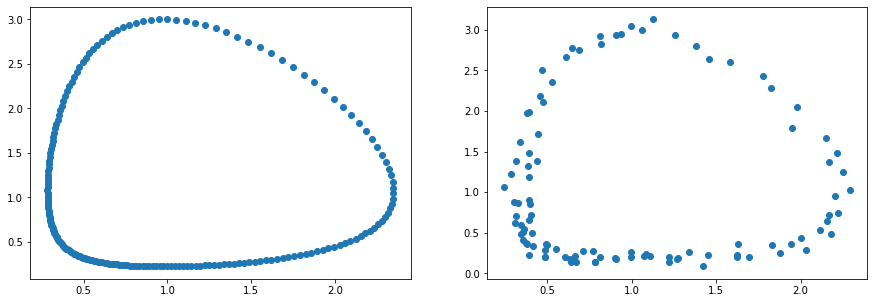

In [350]:
default_points = [[1], [3]]
parameters = [1, 1, 2, 2]
t = 5
n = 100
RungeKutta4(default_points, t, n, parameters[0], parameters[1], parameters[2], parameters[3], f_u, f_v)

x, y = np.array(default_points[0]), np.array(default_points[1])
sigma = 20

noized_points = [x + np.random.randn(x.size) / sigma,
                 y + np.random.randn(y.size) / sigma]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(points[0], points[1])
ax[1].scatter(noized_points[0], noized_points[1])

Optimized params: [1.1490097898679488, 1.074831253319595, 1.6809809904427644, 1.7247541637711696]
Init params: [1, 1, 2, 2]


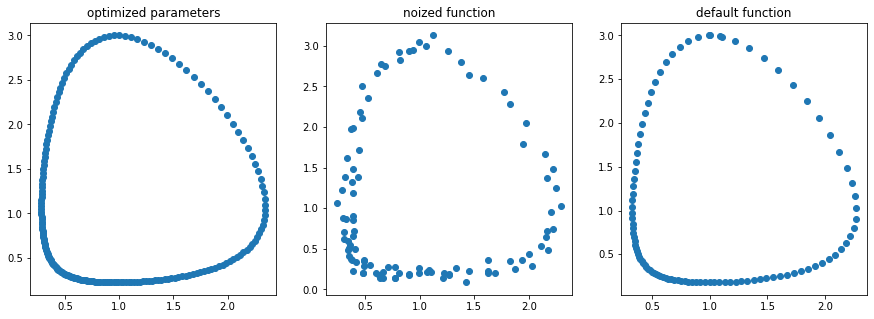

In [352]:
params = [0.2, 0.3, 1.2, 1.3]
h = 0.0001
epochs = 350

for i in range(epochs):
    points = [[1], [3]]
    RungeKutta4(points, t, n * 2, params[0], params[1], params[2], params[3], f_u, f_v)
    
    alpha_v = [[0], [0]]
    RungeKutta4(alpha_v, t, n, params[0], params[1], params[2], params[3],
          f_u_alpha_v, f_v_alpha_v, points[0], points[1])
    
    alpha_u = [[0], [0]]
    RungeKutta4(alpha_u, t, n, params[0], params[1], params[2], params[3],
          f_u_alpha_u, f_v_alpha_u, points[0], points[1])
    
    gamma_v = [[0], [0]]
    RungeKutta4(gamma_v, t, n, params[0], params[1], params[2], params[3],
          f_u_gamma_v, f_v_gamma_v, points[0], points[1])
    
    gamma_u = [[0], [0]]
    RungeKutta4(gamma_u, t, n, params[0], params[1], params[2], params[3],
          f_u_gamma_u, f_v_gamma_u, points[0], points[1])
    
    grad = Gradient_J(points, noized_points, [alpha_u, gamma_u, alpha_v, gamma_v])
    
    for i in range(len(params)):
        params[i] -= h * grad[i]

print("Optimized params: {}".format(params))
print("Init params: {}".format(parameters))
        
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(points[0], points[1])
ax[0].set_title("optimized parameters")

ax[1].scatter(noized_points[0], noized_points[1])
ax[1].set_title("noized function")

ax[2].scatter(default_points[0], default_points[1])
ax[2].set_title("default function")

plt.show()